<a href="https://colab.research.google.com/github/2019mohamed/Sprints-tasks/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [ ]:
data = pd.read_csv('ab_data.csv')
data.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the cell below to find the number of rows in the dataset.

In [ ]:
n = data.shape[0]
print(n)

294478


c. The number of unique users in the dataset.

In [ ]:
data['user_id'].nunique()

290584

d. The proportion of users converted.

In [ ]:
#len(data[data['converted'] == 1])/n
data['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [ ]:
data.groupby(["group", "landing_page"]).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

f. Do any of the rows have missing values?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [ ]:
df2 =data.drop(
    data[((data['group'] == 'treatment') == (data['landing_page'] == 'new_page')) == False].index)
df2.head()
print(len(df2))

290585


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [ ]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [ ]:
#print(len(df2) == df2['user_id'].nunique())
print(df2[df2.duplicated(subset = ['user_id'])]['user_id'])
print(df2[df2.duplicated(subset = ["user_id"])])

2893    773192
Name: user_id, dtype: int64
      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


c. What is the row information for the repeat **user_id**? 

In [ ]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [ ]:
df2.drop_duplicates(subset = 'user_id' , keep = 'last' , inplace = True)
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [ ]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [ ]:
df2[df2['group'] == 'control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [ ]:
df2[df2['group'] == 'treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [ ]:
len(df2[df2['landing_page'] == 'new_page'])/len(df2)

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

Summary of parts a to d:
the new dataframe df2 has 290584 users, has 1 duplicate only, so, we removed it.

1-The propabilty of user has new_page is 0.5(i.e., fair(uniform) distribution).

2-probability of an individual converting regardless of the page they receive is 0.119(i.e,11.9% ~ 12%).

3-probability of an individual converting, given individual was in the control group is 0.12(12%).

4-probability of an individual converting, given individual was in the treatment group is 0.118(11.8% ~ 12%).

from 3 and 4, we conclude that it isnot sufficient evidence because the differance between them ~ 0.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

We want to prove new page is better than old page. So, we assume old page better than new page(i.e., proof by contradiction). However, hypothesis testing generalizes proof contradiction.

$H_{0}$: $p_{new}$ <= $p_{old}$  ,  $p_{new}$ - $p_{old}$ <= 0

$H_{1}$: $p_{old}$ < $p_{new}$  ,  $p_{old}$ - $p_{new}$ < 0


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [ ]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [ ]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [ ]:
n_new = df2[df2['group'] == 'treatment']['user_id'].nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [ ]:
n_old = df2[df2['group'] == 'control']['user_id'].nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [ ]:
n_new_sim = np.random.choice([1,0], size = n_new, replace = True, p = (p_new, 1-p_new))
n_new_sim.sum()

17617

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [ ]:
n_old_sim = np.random.choice([1,0], size = n_old, replace = True, p = (p_old, 1-p_old))
n_old_sim.sum()

17457

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [ ]:
diff = n_new_sim.mean()-n_old_sim.mean()
diff

0.0010713235350691686

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [ ]:
p_diffs = []
for i in range(10000):
    n_new_sim = np.random.choice([1,0], size = n_new, replace = True, p = (p_new, 1-p_new))
    n_old_sim = np.random.choice([1,0], size = n_old, replace = True, p = (p_old, 1-p_old))
    diff = n_new_sim.mean()-n_old_sim.mean()
    p_diffs.append(diff)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  17.,  135.,  678., 2037., 3070., 2561., 1169.,  303.,   26.,
           4.]),
 array([-0.00452387, -0.00356718, -0.0026105 , -0.00165381, -0.00069712,
         0.00025957,  0.00121626,  0.00217295,  0.00312963,  0.00408632,
         0.00504301]),
 <a list of 10 Patch objects>)

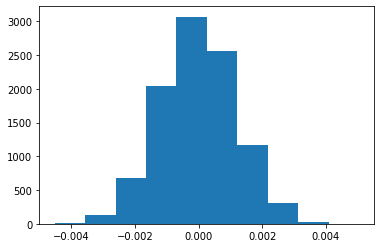

In [ ]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [ ]:
real_diff = df2[df2['group'] == 'treatment']['converted'].mean() - df2[df2['group'] == 'control']['converted'].mean()
p_diffs = np.array(p_diffs)
mean = (p_diffs > real_diff).mean()
mean

0.9063

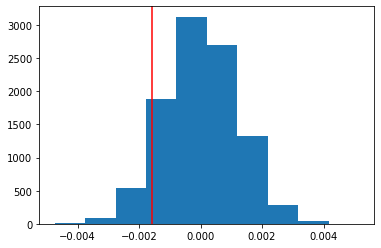

In [ ]:
null_dis = np.random.normal(0 , p_diffs.std() , len(p_diffs))
plt.hist(null_dis)
plt.axvline(real_diff, color = 'r')

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In j, we get p-value of the null hypo. ~ 0.9.

Given the alpha = 0.05, then, we cannot reject the null hypo(i.e., p-value > alpha). So, old_page is good and we havenot to change it. But, alpha = 0.05 means that the Type-I-Error(false positive) Rate is 5%.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [ ]:
import statsmodels.api as sm

convert_old =  df2[df2['group'] == 'control']['converted'].sum()
convert_new =  df2[df2['group'] == 'treatment']['converted'].sum()
n_old =  len(df2[df2['landing_page'] == 'old_page'])
n_new = len(df2[df2['landing_page'] == 'new_page'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [ ]:
z,p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative="smaller")
z,p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

z-score = 1.31 and p_value = 0.9.

p_value of J agree with p_value of k equals ~0.9. So, we cannot reject the null hypo.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

It is binary, so, log. regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [ ]:
df2['intercept'] = 1
df2['ab_page'] = df2['group'].apply(lambda x: 1 if x == 'treatment' else 0)
df2.head(20)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [ ]:
X , y = df2[['ab_page' , 'intercept']] , df2['converted'] 

model = sm.Logit(y,X).fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [ ]:
ret = model.summary2()
ret

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2021-09-08 18:11 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

p_value of ab_page ~ 0.19 > alpha = 0.05, so, conversion is not significant dependent on the ab_page.

null hypo. of regression mode assumes there is no statistically significant relationship between the predictor variable(i.e., coff. equlas 0) and The alternative hypo. is complement of null hypo.(i.e., coff. not equals 0). So, p-value is got by two side, but, in part2 p_value is got by one side.
ref:https://www.statology.org/null-hypothesis-for-linear-regression/

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

"well define" features will be empower the model. But features or random varibles may be collinearited means if we remove one of them isnot effect in model power. So, if we add features, we have to solve the problems such as multicollinearity by VIF mesure and so on... .

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [ ]:
counties = pd.read_csv('countries.csv')
counties.head()
#counties.info()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [ ]:
counties['country'].describe()

count     290584
unique         3
top           US
freq      203619
Name: country, dtype: object

In [ ]:
df2 = df2.merge(counties, on="user_id", how = "left")
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [ ]:
df2 = df2.join(pd.get_dummies(counties['country']))
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1,0


In [ ]:
X , y = df2[['ab_page' , 'intercept' , 'UK' , 'US']] , df2['converted']
model = sm.Logit(y,X).fit()
ret = model.summary2()
ret

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212783.5160
Date:               2021-09-08 18:15 BIC:              212825.8346
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.46584    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ab_page       -0.0150    0.0114   -1.3121  0.1895  -0.0374   0.0074
intercept     -1.9816    0.0261  -75.7983  0.0000  -2.0329  -1.9304
UK            -0.0161    0.0280   -0.5735  0.5663  -0.0709   0.0388
US            -0.0045    0.0264   -0.1692  0.8656  -0.0563   0.0473
==================================================================

"""

Also, conversion is not significant dependent on the ab_page, UK and US based on p_values.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [ ]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1,0


In [ ]:
df2['UK*page'] = df2['UK'] * df2['ab_page']
df2['US*page'] = df2['US'] * df2['ab_page']

X , y = df2[['ab_page' , 'intercept' , 'UK' , 'US' , 'US*page', 'UK*page']] , df2['converted']
model = sm.Logit(y,X).fit()
ret = model.summary2()
ret

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212786.6135
Date:               2021-09-08 18:25 BIC:              212850.0914
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.63017    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ab_page       -0.0325    0.0511   -0.6365  0.5245  -0.1326   0.0676
intercept     -1.9730    0.0358  -55.1205  0.0000  -2.0432  -1.9029
UK            -0.0165    0.0393   -0.4207  0.6740  -0.0935   0.0604
US            -0.0166    0.0371   -0.4485  0.6538  -0.0893   0.0560
US*page        0.0246    0.0528    0.4649  0.6420  -0.0790   0.1281
UK*page        0.0010    0.0560    0.0175  0.9860  -0.1088   0.1107
==================================================================

"""

Based on p_values, the features isnot not significant !!, so, higher order features isnot good features. Also, the higher order features decrease power of UK feature.

Hypothesis Test: a generalization of ‘proof by contradiction’
Hypothesis test is an important tool in statistics and is commonly used in scientific research. I just come up with an idea that the hypothesis test is a generalization of proof by contradiction.
ref:https://yenchic.wordpress.com/2014/01/29/hypothesis-test-a-generalization-of-proof-by-contradiction/

<span style="color: red;">Conclusions</span>

After, hypo. testing and regression analysis with different hypos., so, we havenot to implement the new landing page. This conclusion based on p_value, so, if we change alpha(here, alpha = 0.05) may be the results will be change. 

T-test:

A t-test is a type of inferential statistic used to determine if there is a significant difference between the means of two groups or mean of one group(given null and altr. hypo.s).

Given confidence level, The T-Distribution Table is available in one-tail(if the hypo. say x<=.) and two-tails(if th hypo. say x !=.) formats, so, we get critical point(the rejected intervel less the point) from table. if the t-test value less than critical point, then, we have to reject the null hypo., else we fail to reject the null hypo.


ref:https://www.investopedia.com/terms/t/t-test.asp

    https://en.wikipedia.org/wiki/Student%27s_t-test